# Lista 6

### Algorytmy i struktury danych

#### Urszula Spik i Natalia Jelito

In [136]:
import math
from sympy import *
import time
import random
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

### <span style="color:RosyBrown"> Zadanie 1 </span>

**Treść polecenia**:

Stwórz własną klasę implementującą binarne drzewa przeszukiwań. Zadbaj o poprawne przetwarzanie powtarzających się kluczy.

**Informacje wstępne:**

* Poprawne przetwarzanie powtarzających się kluczy - powinny być one kierowane do prawgo poddrzewa.
* Implementacja bazuje na kodzie z wykładu 9 i książce podanej jako źródło przykładów z wykładu - *Problem Solving with Algorithms and Data Structures using Python* B. Miller, D. Randum


In [121]:
class TreeNode:
    """
    Class of Nodes to Binary Search Tree
    """
    
    def __init__(self, key, payload, left=None, right=None, parent=None):
        """
        Creates Node with specified key
        
        Args:
            key (int): key of Node
            payload: value of Node
            left (TreeNode): left child
            right (TreeNode): right child
            parent (TreeNode): parent of Node
        """
        self.key = key
        self.payload = payload
        self.leftChild = left
        self.rightChild = right
        self.parent = parent

    def hasLeftChild(self):
        """
        Check if Node have left child
        
        Return: 
            (Node): left child;
            (None): doesn't have left child
        """
        return self.leftChild

    def hasRightChild(self):
        """
        Check if Node have right child
        
        Return: 
            (Node): right child;
            (None): doesn't have right child
        """
        return self.rightChild
        
    def isLeftChild(self):
        """
        Check if it is left child
        
        Returns:
            (Bool): True - left child
        """
        return bool(self.parent and self.parent.leftChild == self)

    def isRightChild(self):
        """
        Check if it is right child
        
        Returns:
            (Bool): True - right child
        """
        return bool(self.parent and self.parent.rightChild == self)

    def isRoot(self):
        """
        Check if it is root
        
        Returns:
            (Bool): True - it is root
        """
        return not self.parent

    def isLeaf(self):
        """
        Check if it is leaf
        
        Returns:
            (Bool): True - it is leaf
        """
        return not (self.rightChild or self.leftChild)

    def hasAnyChildren(self):
        """
        Check if has any children
        
        Returns:
            (Bool): True - has any children
        """
        return bool(self.rightChild or self.leftChild)

    def hasBothChildren(self):
        """
        Check if has both children
        
        Returns:
            (Bool): True - has both children
        """
        return bool(self.rightChild and self.leftChild)

    def replaceNodeData(self, key, payload, left, right):
        """
        Replace Node's data
        
        Args:
            key (int): new key
            payload: new payload
            left (TreeNode): new left child
            right (TreeNode): new right child  
        """
        self.key = key
        self.payload = payload
        self.leftChild = left
        self.rightChild = right
        if self.hasLeftChild():
            self.leftChild.parent = self
        if self.hasRightChild():
            self.rightChild.parent = self
    
    def __iter__(self):
        """
        Overload iteration operator;
        Using inorder
        """
        if self:
            if self.hasLeftChild():
                for elem in self.leftChild:
                    yield elem
        yield self.key
        if self.hasRightChild():
            for elem in self.rightChild:
                yield elem
                
    def findMin(self):
        """
        Find the minimum Node
        being descendant of this Node
        
        Returns:
            (Node): minimum Node
        """
        current = self
        while current.hasLeftChild():
            current = current.leftChild
        return current
            
    def findSuccessor(self):
        """
        Find successor of this Node
        
        Returns:
            (Node): successor of this Node
        """
        succ = None
        if self.hasRightChild():
            succ = self.rightChild.findMin()
        else:
            if self.parent:
                if self.isLeftChild():
                    succ = self.parent
                else:
                    self.parent.rightChild = None
                    succ = self.parent.findSuccessor()
                    self.parent.rightChild = self
        return succ
    
    def spliceOut(self):
        """
        Helper function to removing item with both children.
        Delete Node's succesor from its current place.
        """
        if self.isLeaf():
            if self.isLeftChild():
                self.parent.leftChild = None
            else:
                self.parent.rightChild = None
        elif self.hasAnyChildren():
            if self.hasLeftChild():
                if self.isLeftChild():
                    self.parent.leftChild = self.leftChild
                else:
                    self.parent.rightChild = self.leftChild
                    self.leftChild.parent = self.parent
            else:
                if self.isLeftChild():
                    self.parent.leftChild = self.rightChild
                else:
                    self.parent.rightChild = self.rightChild
                self.rightChild.parent = self.parent
    
    def preorder(self):
        """
        Print part of tree in preorder.
        """
        if self != None:
            print(self.key, f"({self.payload})")
            if self.leftChild != None:
                self.leftChild.preorder()
            if self.rightChild != None:   
                self.rightChild.preorder()


class BinarySearchTree:
    """
    Class of Binary Search Tree
    """
    
    def __init__(self):
        """
        Create BTS
        """
        self.root = None
        self.size = 0
        
    def length(self):
        """
        Check length of tree
        
        Returns:
            (int): length of tree
        """
        return self.size
    
    def __len__(self):
        """
        Check length of tree,
        operator overload
        
        Returns:
            (int): length of tree
        """
        return self.size
    
    def __iter__(self):
        """
        Overload iter operator;
        Using inorder.
        """
        return self.root.__iter__()

    def _put(self, key, val, currentNode):
        """
        Helper function of put method.
        
        Args:
            key (int): key of Node to put
            payload: value of Node to put
            currentNode (Node): first potential parent Node
        """
        if key < currentNode.key:
            if currentNode.hasLeftChild():
                self._put(key,val,currentNode.leftChild)
            else:
                currentNode.leftChild = TreeNode(key,val,parent=currentNode)
        else:
            if currentNode.hasRightChild():
                self._put(key,val,currentNode.rightChild)
            else:
                currentNode.rightChild = TreeNode(key,val,parent=currentNode)

    def put(self, key, payload):
        """
        Put new item to the BST
        and change size after puting.
        
        Args:
            key (int): key of new item
            payload: value of new item
        """
        if self.root:
            self._put(key, payload, self.root) 
        else:
            self.root = TreeNode(key, payload)
        self.size = self.size + 1

    
    def __setitem__(self, key, payload):
        """
        Overloading of setitem ([]) operator
        
        Args:
            key (int): key of new element in tree
            payload: value of new element in tree
        """
        self.put(key, payload)
        
    def _get(self, key, currentNode):
        """
        Helper function of get method
        and cointains overloading.
        
        Args:
            key (int): key which value should be find
            currentNode (Node): first potential correct Node
            
        Returns:
            (Node): Node with key which is looking for
        """
        if not currentNode:
            return None

        elif currentNode.key == key:
            return currentNode

        elif key < currentNode.key:
            return self._get(key, currentNode.leftChild)
        else:
            return self._get(key, currentNode.rightChild)

    def get(self, key): 
        """
        Get value of Node with specified key.
        When key repeat themselves, fist find Node with this key.
        
        Args:
            key (int): key of Node which should be find value
            
        Returns:
            value of first find key
        """
        if self.root:
            res = self._get(key, self.root)
            if res:
                return res.payload
            else:
                return None
        else:
            return None


    def __getitem__(self, key):  
        """
        Overloading of getitem ([]) operator
        """
        return self.get(key)

    def __contains__(self, key):
        """
        Overloading of in operator.
        Check if key is in tree
        
        Args:
            key (int): key to check
        """
        if self._get(key, self.root):
            return True
        else:
            return False

    def delete(self,key): 
        """
        Delete Node with specified key form the BST
        
        Arg:
            key (int): key of Node to delete
        """
        if self.size > 1:
            nodeToRemove = self._get(key, self.root)
            if nodeToRemove:
                self.remove(nodeToRemove)
                self.size = self.size-1
            else:
                raise KeyError('There is no that key in tree')
        elif self.size == 1 and self.root.key == key:
            self.root = None
            self.size = self.size - 1
        else:
            raise KeyError('There is no that key in tree')

    def __delitem__(self,key):
        """
        Overloading of del operator
        
        Args:
            key (int): key to delete
        """
        self.delete(key)
    
    def remove(self, currentNode):
        """
        Remove specific Node
        
        Args:
            currentNode (Node): Node to remove
        """
        if currentNode.isLeaf():
            if currentNode.isLeftChild(): 
                currentNode.parent.leftChild = None
            elif currentNode.isLeftChild():
                currentNode.parent.rightChild = None
            else:
                self.root = None
        elif currentNode.hasBothChildren():
            succ = currentNode.findSuccessor()
            succ.spliceOut()
            currentNode.key = succ.key
            currentNode.payload = succ.payload
        else:
            if currentNode.hasLeftChild():
                if currentNode.isLeftChild():
                    currentNode.leftChild.parent = currentNode.parent
                    currentNode.parent.leftChild = currentNode.leftChild
                elif currentNode.isRightChild():
                    currentNode.leftChild.parent = currentNode.parent
                    currentNode.parent.rightChild = currentNode.leftChild
                else:
                    currentNode.replaceNodeData(currentNode.leftChild.key,
                                    currentNode.leftChild.payload,
                                    currentNode.leftChild.leftChild,
                                    currentNode.leftChild.rightChild)
            else:
                if currentNode.isLeftChild():
                    currentNode.rightChild.parent = currentNode.parent
                    currentNode.parent.leftChild = currentNode.rightChild
                elif currentNode.isRightChild():
                    currentNode.rightChild.parent = currentNode.parent
                    currentNode.parent.rightChild = currentNode.rightChild
                else:
                    currentNode.replaceNodeData(currentNode.rightChild.key,
                                    currentNode.rightChild.payload,
                                    currentNode.rightChild.leftChild,
                                    currentNode.rightChild.rightChild)
                    
    def preorder(self):
        """
        Preorder BTS printing
        """
        if self.root:
            self.root.preorder()
        
    def inorder(self):
        """
        Inorder BTS printing
        """
        if self.root:
            for i in self:
                print(i)

    def _print(self, currentNode, space) :
        """
        Helper function to representation
        
        Args:
            currentNode (Node): begin node to print
            space (int): space bethween levels
        """
    
        if not currentNode:
            return
        space += 10
        self._print(currentNode.rightChild, space)
        print()
        for i in range(10, space):
            print(end=" ")
        print(currentNode.key)
        self._print(currentNode.leftChild, space)

    def printBST(self) :
        """
        Representation of BST
        """
        self._print(self.root, 0)
        
#additional DSW alghorithm

    def rotateRight(self, rotRoot):
        """
        Function rotate tree in right direction
        against a particular Nod
        
        Args:
            rotRoot (Node): Node agaist which 
                            will be rotate
        """
        newRoot = rotRoot.leftChild
        rotRoot.leftChild = newRoot.rightChild
        if newRoot.rightChild != None:
            newRoot.rightChild.parent = rotRoot
        newRoot.parent = rotRoot.parent
        if rotRoot.isRoot():
            self.root = newRoot
        else:
            if rotRoot.isRightChild():
                rotRoot.parent.rightChild = newRoot
            else:
                rotRoot.parent.leftChild = newRoot
        newRoot.rightChild = rotRoot
        rotRoot.parent = newRoot

    def rotateLeft(self,rotRoot):
        """
        Function rotate tree in left direction
        against a particular Nod
        
        Args:
            rotRoot (Node): Node agaist which 
                            will be rotate
        """
        newRoot = rotRoot.rightChild
        rotRoot.rightChild = newRoot.leftChild
        if newRoot.leftChild != None:
            newRoot.leftChild.parent = rotRoot
        newRoot.parent = rotRoot.parent
        if rotRoot.isRoot():
            self.root = newRoot
        else:
            if rotRoot.isLeftChild():
                rotRoot.parent.leftChild = newRoot
            else:
                rotRoot.parent.rightChild = newRoot
        newRoot.leftChild = rotRoot
        rotRoot.parent = newRoot
        
    
    def DSWtovine(self):
        """
        Convert tree to one line (list)
        """
        temp = self.root
        while temp != None:
            if temp.hasLeftChild():
                self.rotateRight(temp)
                temp = temp.parent
            else:
                temp = temp.rightChild
            
    def DSWtotree(self):
        """
        Convert BST to balanced DSW tree
        """
        self.DSWtovine()
        n = self.size
        m = 2**(math.floor(math.log(n+1, 2)))-1
        for i in range(n-m):
            self.rotateLeft(self.root)
        while m > 1:
            m = math.floor(m/2)
            currentNode = self.root
            for i in range(m):
                self.rotateLeft(currentNode)
                currentNode = currentNode.parent.rightChild
            

**Testy**

In [344]:
mytree = BinarySearchTree()
mytree[25]="a"
mytree[20]="b"
mytree[23]="c"
mytree[15]="d"
mytree[28]="e"
mytree[30]="f"
mytree[40]="g"

In [345]:
mytree.printBST()


                              40

                    30

          28

25

                    23

          20

                    15


In [346]:
mytree.delete(20)

In [347]:
mytree.printBST()


                              40

                    30

          28

25

          23

                    15


In [348]:
mytree.put(23, "b")

Gdy są takie same pójdzie do prawego poddrzewa

In [349]:
mytree.printBST()


                              40

                    30

          28

25

                    23

          23

                    15


**DSW testy**

In [350]:
mytree.DSWtotree()

In [351]:
mytree.printBST()


                    40

          30

                    28

25

                    23

          23

                    15


In [352]:
mytree.DSWtovine()

In [353]:
mytree.printBST()


                                                            40

                                                  30

                                        28

                              25

                    23

          23

15


### <span style="color:RosyBrown"> Zadanie 2</span>

Zaimplementuj kopiec binarny. Korzystając z tego kopca napisz funkcję
sortującą listę elementów w czasie O(n log n). Przeprowadź analizę eksperymentalną czasu wykonania algorytmu.

In [254]:
class BinHeap:
    """ 
    Class of Binary Heaps
    """
    def __init__(self):
        """
        Creates a Binary Heap
        """
        self.heapList = [0]
        self.currentSize = 0

    def percUp(self,i): ## przenoszenie do góry
        """
        Bring round relation between parent and children
        (From bottom to top)
        Args:
            i (int): index of Parent Node
        """
        while i // 2 > 0:
            if self.heapList[i] > self.heapList[i // 2]:
                tmp = self.heapList[i // 2]
                self.heapList[i // 2] = self.heapList[i]
                self.heapList[i] = tmp
            i = i // 2      
        
    def insert(self,k):
        """
        Adds an element to heap
        Args:
            k (int): element to add
        """
        self.heapList.append(k)
        self.currentSize = self.currentSize + 1
        self.percUp(self.currentSize)  

    def findMax(self):
        """
        Finds maximum value of heap

        Returns:
            (int): maximum element
        """
        return self.heapList[1]

    def percDown(self, i):
        """
        Bring round relation between parent and children.
        (From top of the heap to bottom)

        Args:
            i ([int]): index of parent node 
        """
        while( (i*2 )<= self.currentSize):
            mc = self.maxChild(i)
            if self.heapList[i] < self.heapList[mc]:
                temp = self.heapList[i]
                self.heapList[i] = self.heapList[mc]
                self.heapList[mc] = temp
            i = mc

    def maxChild(self, i):
        """
        Finds bigger child (index)

        Args:
            i ([int]): index of parent

        Returns:
            [int]: index o f bigger child
        """
        if i * 2 + 1 > self.currentSize:
            return i*2
        else:
            if self.heapList[i*2] > self.heapList[i*2 +1]:
                return i*2
            else:
                return i*2 +1

    def delMax(self):
        """
        Deletes maximum element (root)

        Returns:
            [int]: maximum element
        """
        retval = self.heapList[1]
        self.heapList[1] = self.heapList[self.currentSize]
        self.currentSize -= 1
        self.heapList.pop()
        self.percDown(1)
        return retval

    def buildHeap(self, alist):
        """Creates a heap from a list

        Args:
            alist ([list]): list for heap
        """
        i = len(alist)//2
        self.currentSize = len(alist)
        self.heapList = [0] +alist[:]
        while (i>0):
            self.percDown(i)
            i -= 1



    def __str__(self):
        txt = "{}".format(self.heapList[1:])
        return txt

    def sortHeap(self):
        """
        Sorts list of elements

        Returns:
            [list]: sorted list
        """
        n = self.currentSize
        heap_sorted = [ ]

        for i in range(0,n):
            temp = self.delMax()
            heap_sorted.append(temp)

        return heap_sorted
    
def sorting_time(n):
    """
    Checks  how long it takes to sort a list of elements using Binary Heap
    Generates a plot of times
    Args:
        n ([int]): length of maximum list to sort
    """
    times= []
    for k in range(0,n, 100):
        bh = BinHeap()
        bh.buildHeap([random.randint(0, 100) for i in range(k)])

        start_time = time.time()

        bh.sortHeap()

        stop_time = time.time()

        diff = stop_time - start_time
        times.append(diff)
    plt.scatter([i for i in range(0,n, 100)],times, color="magenta")
    plt.show

Sprawdzenia

In [255]:
b = BinHeap()
b.buildHeap([1,2,5,3,4,6,3])
print(b)
print(b.sortHeap())

[6, 4, 5, 3, 2, 1, 3]
[6, 5, 4, 3, 3, 2, 1]


In [256]:
a = BinHeap()
a.insert(1)
a.insert(2)
a.insert(5)
a.insert(10)
a.insert(15)

print(a)
print(a.delMax())
print(a)


[15, 10, 2, 1, 5]
15
[10, 5, 2, 1]


Dane na temat czasu sortowania algorytmu o czasie $O(n\mathrm{log}n)$ zostały przedstawione na wykresie:

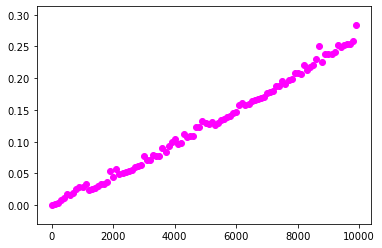

In [243]:
sorting_time(10000)

### <span style="color:RosyBrown"> Zadanie 3</span>

Zaimplementuj kopiec binarny o ograniczonej wielkości n. Innymi słowy,
stwórz strukturę przechowującą n najważniejszych (największych) wartości.


In [257]:
class LBHeap(BinHeap):
    """
    Class of Limited Binary Heap
    """

    def __init__(self, n):
        """Creates Limited Binary Heap

        Args:
            n ([int]): maximum size of heap
        """
        super().__init__()
        self.max_size_of_heap = n 
        self.heapList = [0]
        self.currentSize = 0

    def insert(self,element):
        """
        Adds an element to heap
        Args:
            element (int): element to add
        """
        if self.currentSize == 0:
            self.heapList.append(element)
            self.currentSize = self.currentSize + 1            

        else:

            if element < self.findMax() and self.currentSize == self.max_size_of_heap:
                self.delMax()
                self.heapList.append(element)
                self.currentSize = self.currentSize + 1
                self.percUp(self.currentSize)

                
            elif element >= self.findMax() and self.currentSize == self.max_size_of_heap:
                print(f"The value {element} is too big to put on the heap")

            else:
                self.heapList.append(element)
                self.currentSize = self.currentSize + 1
                self.percUp(self.currentSize)


    def buildHeap(self,alist):
        """Creates a heap from a list

        Args:
            alist ([list]): list for heap
        """
        for i in range(len(alist)):
            self.insert(alist[i])

        

Testy:

In [258]:
de = LBHeap(6)

de.insert(1)
de.insert(2)
de.insert(5)
de.insert(10)
de.insert(15)

print(de)
de.insert(6)
print(de)

[15, 10, 2, 1, 5]
[15, 10, 6, 1, 5, 2]


In [259]:
c = LBHeap(5)
c.buildHeap([1,3,4,6])
print(c)
c.insert(10)
print(c)
c.insert(2)
print(c)
c.insert(5)
c.delMax()
print(c)

[6, 4, 3, 1]
[10, 6, 3, 1, 4]
[6, 4, 3, 1, 2]
[4, 2, 3, 1]


In [260]:
d = LBHeap(3)
d.buildHeap([1,2,3,5,6])
print(d)

The value 5 is too big to put on the heap
The value 6 is too big to put on the heap
[3, 1, 2]


In [262]:
d.insert(-3)

In [263]:
print(d)

[2, 1, -3]


Zachowanie kopca jest poprawne :)

### <span style="color:RosyBrown"> Zadanie 4 </span>

Napisz funkcję, która na wejściu przyjmuje drzewo wyprowadzenia jakiegoś wyrażenia matematycznego, a na wyjściu zwraca pochodną tego
wyrażenia względem podanej zmiennej.


* drzewo binarne na podstawie wykładu

In [264]:
class BinaryTree:
    """
    Class of Binary tree
    """
    
    def __init__(self, root):
        """
        Create tree
        
        Args:
            root: key of root
        """
        self.key = root
        self.leftChild = None
        self.rightChild = None

    def insertLeft(self,newNode):
        """
        Insert element to the left
        
        Args:
            newNode: node's key to insert
                    or node to insert
        """
        if self.leftChild == None: #$
            if type(newNode) == BinaryTree:
                self.leftChild = newNode
            else:
                self.leftChild = BinaryTree(newNode)
        else:
            if type(newNode) == BinaryTree:
                temp = newNode
                temp.insertLeft(self.leftChild)
                self.leftChild = temp
            else:
                temp = BinaryTree(newNode)
                temp.leftChild = self.leftChild
                self.leftChild = temp
            
    def insertRight(self,newNode):
        """
        Insert element to the left
        
        Args:
            newNode: node key to insert
                    or node to insert
        """
        if self.rightChild == None:
            if type(newNode) == BinaryTree:
                self.rightChild = newNode
            else:
                self.rightChild = BinaryTree(newNode)
        else:
            if type(newNode) == BinaryTree:
                temp = newNode
                temp.insertRight(self.rightChild)
                self.rightChild = temp
            else:
                temp = BinaryTree(newNode)
                temp.rightChild = self.rightChild
                self.rightChild = temp
            
    def getRightChild(self):
        """
        Give right child key
        
        Returns:
            right child key
        """
        return self.rightChild
    
    def getLeftChild(self):
        """
        Give right child key
        
        Returns:
            right child key
        """
        return self.leftChild
    
    def setRootVal(self, value):
        """
        Set value to the root key
        """
        self.key = value

    def getRootVal(self):
        """
        Get value of the root key
        
        Returns:
            value of root key
        """
        return self.key

    def postorder(self):
        res = ""

        if self:
            if self.leftChild:
                res = self.leftChild.postorder()
            if self.rightChild:
                res = res + self.rightChild.postorder()
            res+=f"{self.key} "
        return res

* implementacja stosu (wersja z wykładów)

In [265]:
class Stack:
    def __init__(self):
        """
        Create stack
        """
        self.items = []
        
    def isEmpty(self):
        """
        Check if stack is empty

        Returns:
            (bool): True if stack is empty, otherwise False
        """
        return self.items == []
    
    def push(self, item):
        """
        Add item to the end

        Args:
            item: item to add
        """
        self.items.append(item)
        
    def pop(self):
        """
        Delate last item

        Returns:
            Delated item
        """
        return self.items.pop()
    
    def peek(self):
        """
        Return last item
        
        Returns:
            Last item
        """
        return self.items[len(self.items)-1]
    
    def size(self):
        """
        Check size of stack
        
        Returns:
            (int): Size of stack
        """
        return len(self.items)
    
    def __str__(self):
        """
        Show str form of stack
        
        Returns:
            (str): str from stack
        """
        return str(self.items)

* Tworzymy drzewo wprowadzenia

In [266]:
def preorder(tree):
    """
    Preorder printing Binary Tree
    """
    if tree:
        print(tree.getRootVal())
        preorder(tree.getLeftChild())
        preorder(tree.getRightChild())

In [267]:
def postorder(tree):
    """
    Postorder printing Binary Tree
    """
    if tree != None:
        postorder(tree.getLeftChild())
        postorder(tree.getRightChild())
        print(tree.getRootVal())

In [268]:
def RPNParseTree(fpexp):
    """
    Crate Parse Tree of mathematical expression
    in reverse polish notation
    
    Args:
        (str): mathematical expression 
        in reverse polish notation
    """
    fplist = fpexp.split()
    pStack = Stack()
    
    if len(fplist)==1:
        return BinaryTree(fpexp)

    for i in fplist:
        if i in ['+', '-', '*', '/', "**"]:
            currentTree = BinaryTree('')
            currentTree.setRootVal(i)
            currentTree.insertRight(pStack.pop())
            currentTree.insertLeft(pStack.pop())
            pStack.push(currentTree)
        elif i in ["log", "cos", "sin", "tg", "ctg"]:
            currentTree = BinaryTree('')
            currentTree.setRootVal(i)
            left = pStack.pop()
            currentTree.insertLeft(left)
            pStack.push(currentTree)
        else:
            pStack.push(i)
            
    return pStack.pop()

In [269]:
tree = "2 3 x log - * 4 5 * **"

In [270]:
tree.split()

['2', '3', 'x', 'log', '-', '*', '4', '5', '*', '**']

In [271]:
preorder(RPNParseTree(tree))

**
*
2
-
3
log
x
*
4
5


Działa dobrze :)

Przechodzimy teraz do głównej funkcji liczącej pochodną

In [388]:
def derivative(parseTree, variable="x"):
    """
    Create ParseTree of derivative 
    mathematical expression in given ParseTree
    
    Args:
        parseTree (BinaryTree): tree to differentiate
        variable (str): variable use to differentiate
    """
    diff = BinaryTree("")
    
    if parseTree.getRootVal() in ["+", "-"] :
        diff.setRootVal(parseTree.getRootVal())
        diff.insertLeft(derivative(parseTree.leftChild, variable))
        diff.insertRight(derivative(parseTree.rightChild, variable))
    elif parseTree.getRootVal() == "*":
        diff.setRootVal("+")
        diff.insertLeft("*")
        diff.insertRight("*")
        diff.getLeftChild().insertLeft(parseTree.leftChild)
        diff.getLeftChild().insertRight(derivative(parseTree.rightChild, variable))
        diff.getRightChild().insertLeft(derivative(parseTree.leftChild, variable))
        diff.getRightChild().insertRight(parseTree.rightChild)
    elif parseTree.getRootVal() == "/":
        diff.setRootVal("/")
        diff.insertLeft("-")
        diff.insertRight("**")
        diff.getLeftChild().insertLeft("*")
        diff.getLeftChild().getLeftChild().insertLeft(derivative(parseTree.leftChild, variable))
        diff.getLeftChild().getLeftChild().insertRight(parseTree.rightChild)
        diff.getLeftChild().insertRight("*")
        diff.getLeftChild().getRightChild().insertLeft(parseTree.leftChild)
        diff.getLeftChild().getRightChild().insertRight(derivative(parseTree.rightChild, variable))
        diff.getRightChild().insertLeft(parseTree.rightChild)
        diff.getRightChild().insertRight("2")
        
    elif parseTree.getRootVal() in ["sin", "cos", "tg", "ctg", "log"]:
        inside = derivative(parseTree.leftChild, variable)
        if parseTree.getRootVal() == "sin":
            diff.setRootVal("*")
            diff.insertLeft("cos")
            diff.leftChild.insertLeft(parseTree.leftChild)
            diff.insertRight(inside)
        elif parseTree.getRootVal() == "cos":
            diff.setRootVal("*")
            diff.insertLeft("sin")
            diff.insertRight("*")
            diff.rightChild.insertRight("-1")
            diff.rightChild.insertLeft(inside)
            diff.leftChild.insertLeft(parseTree.leftChild)
        elif parseTree.getRootVal() == "tg":
            diff.setRootVal("*")
            diff.insertRight(inside)
            diff.insertLeft("/")
            diff.leftChild.insertLeft("1")
            diff.leftChild.insertRight("**")
            diff.leftChild.rightChild.insertLeft("cos")
            diff.leftChild.rightChild.leftChild.insertLeft(parseTree.leftChild)
            diff.leftChild.rightChild.insertRight("2")
        elif parseTree.getRootVal() == "ctg":
            diff.setRootVal("*")
            diff.insertRight("*")
            diff.rightChild.insertLeft("-1")
            diff.rightChild.insertRight(inside)
            diff.insertLeft("/")
            diff.leftChild.insertLeft("1")
            diff.leftChild.insertRight("**")
            diff.leftChild.rightChild.insertLeft("sin")
            diff.leftChild.rightChild.leftChild.insertLeft(parseTree.leftChild)
            diff.leftChild.rightChild.insertRight("2")
        elif parseTree.getRootVal() == "log":
            diff.setRootVal("*")
            diff.insertRight(inside)
            diff.insertLeft("/")
            diff.leftChild.insertLeft("1")
            diff.leftChild.insertRight(parseTree.leftChild)
            
    elif parseTree.getRootVal() == "**":
        left = derivative(parseTree.leftChild, variable).key
        right = derivative(parseTree.rightChild, variable).key
        if left == "0" and right == "0":
            diff.setRootVal("0")
        elif right == "0":
            diff.setRootVal("*")
            diff.insertRight(derivative(parseTree.leftChild, variable))
            diff.insertLeft("*")
            diff.leftChild.insertLeft(parseTree.rightChild)
            diff.leftChild.insertRight("**")
            diff.leftChild.rightChild.insertLeft(parseTree.leftChild)
            diff.leftChild.rightChild.insertRight("-")
            diff.leftChild.rightChild.rightChild.insertRight("1")
            diff.leftChild.rightChild.rightChild.insertLeft(parseTree.rightChild.key)
        elif left == "0":
            diff.setRootVal("*")
            diff.insertRight("**")
            diff.rightChild.insertLeft(parseTree.leftChild)
            diff.rightChild.insertRight(parseTree.rightChild)
            diff.insertLeft("log")
            diff.leftChild.insertLeft(parseTree.leftChild)
        else:
            part = BinaryTree("")
            part.setRootVal("*")
            part.insertLeft("log")
            part.leftChild.insertLeft(parseTree.leftChild)
            part.insertRight(parseTree.rightChild)
            diff.setRootVal("*")
            diff.insertRight("**")
            diff.rightChild.insertLeft("e")
            diff.rightChild.insertRight(part)
            diff.insertLeft(derivative(part, variable))
            
    elif parseTree.getRootVal() == variable:
        diff.setRootVal("1")
    
    else:
        diff.setRootVal("0")
    return diff

In [273]:
x = RPNParseTree("x tg")

In [274]:
test = derivative(RPNParseTree("x cos"))
preorder(test)

*
sin
x
*
1
-1


Funkcja wykonująca operacje dla danego operatora (bazuje na wykładzie)

In [275]:
def doMath(op, num1, num2):
    """
    Do math operation
    for specified operator
    
    Args:
        op: operator
        num1: first number for operation
        num2: second number for operation
    
    Returns:
        result of operation
    """
    if op == "*":
        return num1 * num2
    elif op == "/":
        return num1 / num2
    elif op == "+":
        return num1 + num2
    elif op == "-":
        return num1 - num2
    elif op == "**":
        return num1 ** num2

In [276]:
def isnumber(num):
    """
    Check if value can be number
    
    Args: 
        num: number to check
        
    Returns
        (bool): True, False
    """
    try:
        float(num)
        return True
    except:
        return False

In [277]:
def number_changer(num):
    """
    Change number to correct form
    
    Args: 
        num: number to change
        
    Returns:
        Changed number
    """
    try:
        return int(num)
    except:
        return float(num)

In [215]:
def postfixEval(postfixExpr, variable = "x"):
    """
    Count value of postfix expression
    
    Args:
        postfixExpr (str): expression to evaluate
        variable (str): variable in expression
        
    Returns:
        (str) value of expression
    """
    operandStack = Stack()
    postfixExpr = postfixExpr.replace("e", "E")
    tokenList = postfixExpr.split()
    x = Symbol(variable)
    
    if len(tokenList) == 1:
        return parse_expr(postfixExpr)

    for token in tokenList:
        if isnumber(token):
            operandStack.push(number_changer(token))
        elif token == "E":
            operandStack.push(parse_expr("E"))
        elif token in ["sin", "cos", "tg", "ctg", "log"]:
            num = operandStack.pop()
            operandStack.push(parse_expr(f"{token}({num})"))
        elif token in ['+', '-', '*', '/', "**"]:
            operand2 = operandStack.pop()
            operand1 = operandStack.pop()
            result = doMath(token,operand1,operand2)
            operandStack.push(result)
        else:
            operandStack.push(Symbol(token))
    return operandStack.pop()

In [278]:
postfixEval("0 0 + x 0 * 1 5 * + +")

5

In [279]:
w = RPNParseTree("10 5 + x 5 * +")
z = derivative(w)
postorder(z)

0
0
+
x
0
*
1
5
*
+
+


### **Główna funkcja**

Zasady:
* wyrażenie zapisane w odwróconej notacji polskiej,
* kolejne elementy są oddzielone spacjami.
* e będzie oznaczało liczbę Eulera
* log - logarytm naturalny

Wynik jest zwracany w tym wypadku jako wyrażenie w sympy'u ponieważ na potrzeby tej listy jest po prostu najbardziej czytelną opcją do sprawdzania poprawności.

In [280]:
def diff_of_RPN(expr, variable="x"):
    """
    Evaluate derivative of math
    expression in reverse polish notation
    
    Args:
        expr (str): Mathematical expression
        in RPN to diff
        variable (str): the differentiation variable
    
    Returns:
        value of diff as sympy expression
    """
    rpntree = RPNParseTree(expr)
    difftree = derivative(rpntree, variable)
    
    return postfixEval(difftree.postorder(), variable)    

Testowe użycia:

In [371]:
diff_of_RPN("10 5 + x 5 * +")

5

In [372]:
diff_of_RPN("x 4 **")

4*x**3

In [373]:
diff_of_RPN("y 4 ** 3 x * + y sin /", "y")

(4*y**3*sin(y) - (3*x + y**4)*cos(y))/sin(y)**2

In [374]:
diff_of_RPN("y 4 ** y sin /", "y")

(-y**4*cos(y) + 4*y**3*sin(y))/sin(y)**2

In [375]:
diff_of_RPN("4 x **")

4**x*log(4)

In [376]:
diff_of_RPN("e log x *", "x")

1

In [377]:
diff_of_RPN("x x **", "x")

(log(x) + 1)*exp(x*log(x))

In [378]:
diff_of_RPN("x x 2 ** **", "x")

(2*x*log(x) + x)*exp(x**2*log(x))

In [379]:
diff_of_RPN("x x 2 ** **", "w")

0

In [380]:
diff_of_RPN("w", "w")

1

In [381]:
diff_of_RPN("w 2 ** sin", "w")

2*w*cos(w**2)

In [382]:
diff_of_RPN("w 2 ** log cos", "w")

-2*sin(log(w**2))/w

In [383]:
diff_of_RPN("x 2 ** x + tg")

(2*x + 1)/cos(x**2 + x)**2

In [384]:
diff_of_RPN("3 x ** log")

log(3)

In [385]:
diff_of_RPN("x ctg", "x")

-1/sin(x)**2

In [386]:
diff_of_RPN("3 x ** log x /")

(x*log(3) - log(3**x))/x**2

In [387]:
diff_of_RPN("x ctg y x * +", "x") 

y - 1/sin(x)**2

In [369]:
diff_of_RPN("x y **")

x**(y - 1)*y

In [389]:
diff_of_RPN("y x **")

y**x*log(y)

In [370]:
diff_of_RPN("x 3 **")

3*x**2

Wszystkie wyniki wyszły poprawnie :)

KONIEC